# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
data = pd.read_csv(r'/Users/edgartome_1/IronHack/IronLabs/Module3/Lab9/data/Wholesale customers data.csv')
data.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
allcol = list(data.columns)
allcol
for x in allcol:
    print(x)
    print(data[x].unique())
    print('\n')

Channel
[2 1]


Region
[3 1 2]


Fresh
[ 12669   7057   6353  13265  22615   9413  12126   7579   5963   6006
   3366  13146  31714  21217  24653  10253   1020   5876  18601   7780
  17546   5567  31276  26373  22647  16165   9898  14276   4113  43088
  18815   2612  21632  29729   1502    688  29955  15168   4591  56159
  24025  19176  10850    630   9670   5181   3103  44466  11519   4967
   6269   3347  40721    491  27329   5264   4098   5417  13779   6137
   8590  35942   7823   9396   4760     85      9  19913   2446   8352
  16705  18291   4420  19899   8190  20398    717  12205  10766   1640
   7005    219  10362  20874  11867  16117  22925  43265   7864  24904
  11405  12754   9198  11314   5626      3     23    403    503   9658
  11594   1420   2932  56082  14100  15587   1454   8797   1531   1406
  11818  12579  19046  14438  18044  11134  11173   6990  20049   8258
  17160   4020  12212  11170  36050  76237  19219  21465    140  42312
   7149   2101  14903   9434   7388   

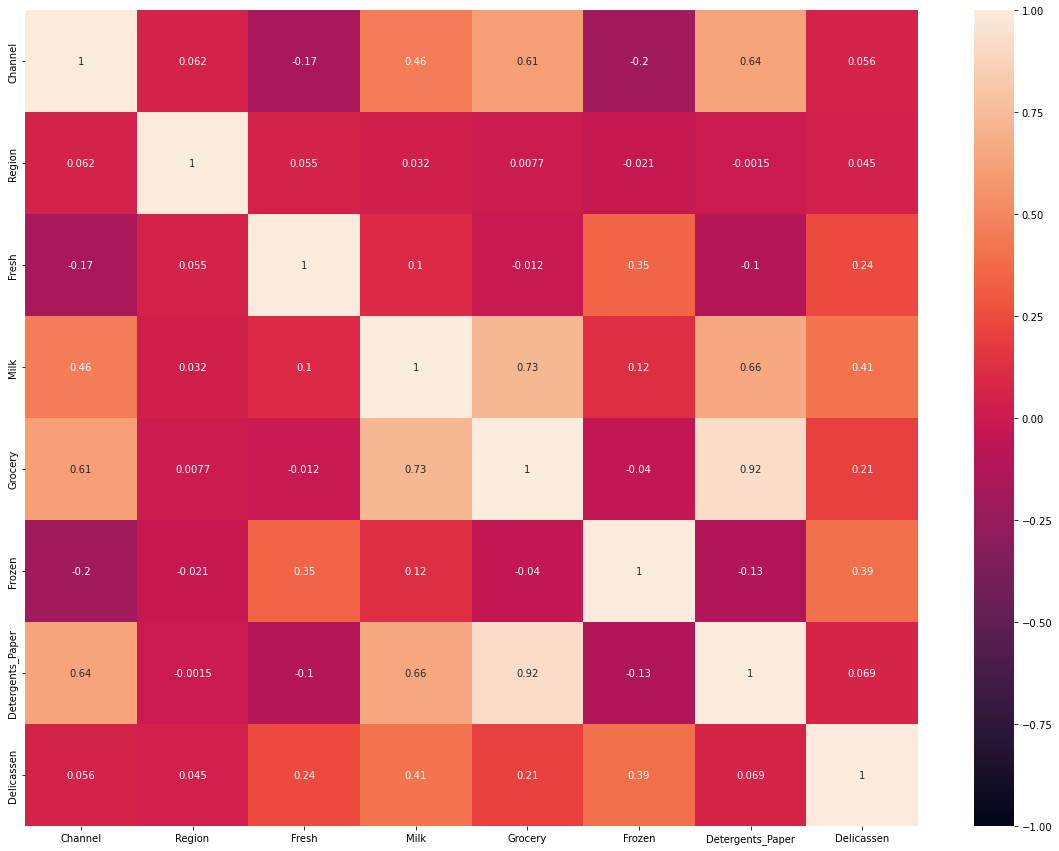

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

In [6]:
data.describe()

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

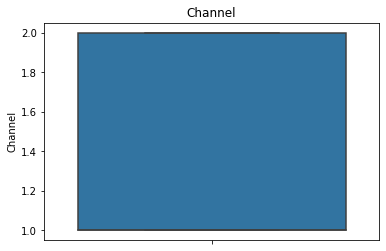

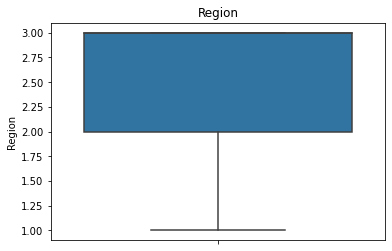

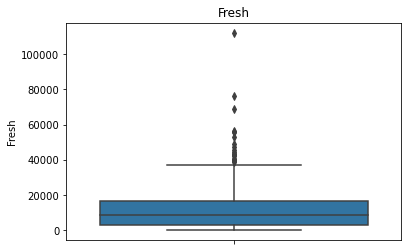

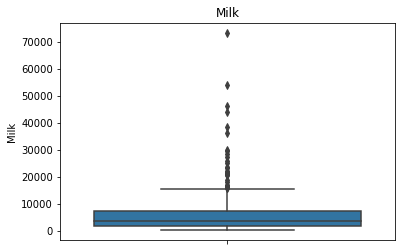

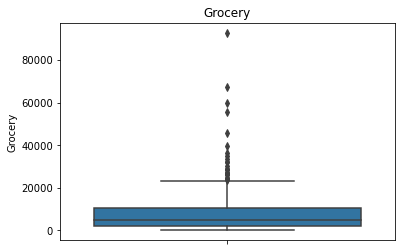

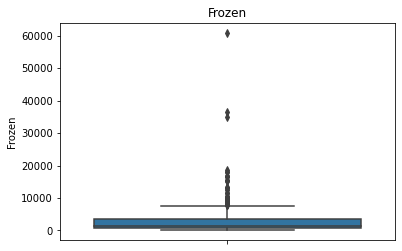

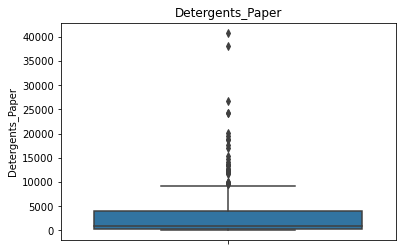

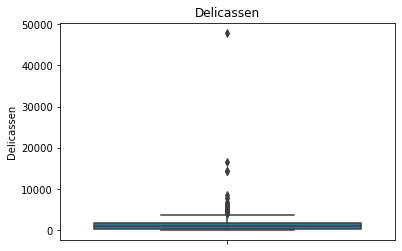

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
numcol = data.columns
for x in numcol:
    sns.boxplot(data = data, y=x)
    plt.title(x)
    plt.show()

In [8]:
#sns.boxplot(data=data)

In [9]:
#for col in data.columns:
    #sns.distplot(data[col],hist=True)
    #plt.xlabel(col)
    #plt.show()

In [10]:
#Print the numebr of the outliers by column
for x in numcol:
    Q3 = data[x].quantile(0.75)
    Q1= data[x].quantile(0.25)
    IQR = Q3 - Q1
    filters = data[data[x]>Q3 + 1.5*IQR]
    print(x)
    print(len(filters))
    print('\n')

Channel
0


Region
0


Fresh
20


Milk
28


Grocery
24


Frozen
43


Detergents_Paper
30


Delicassen
27




In [11]:
# Your observations here
#The column of Detergente and Groceries have high correlation, should drop one of the columns.
#The is no missing values.

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [12]:
# Your code here
#Decide to not clean
#data = data.drop('Detergents_Paper', axis=1)
#data.head()

In [13]:
#plt.figure(figsize=(20, 15))
#heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

In [14]:
#numcol = data.columns
#for x in numcol:
    #sns.boxplot(data = data, y=x)
    #plt.title(x)
    #plt.show()

In [15]:
#To remove outliers
#for x in numcol:
    #Q3 = data[x].quantile(0.75)
    #Q1= data[x].quantile(0.25)
    #IQR = Q3 - Q1
    #data.drop(data[data[x]>Q3 + 1.5*IQR].index,inplace=True)
    #data.drop(data[data[x]<Q1 - 1.5*IQR].index,inplace=True)

In [16]:
#numcol = data.columns
#for x in numcol:
    #sns.boxplot(data = data, y=x)
    #plt.title(x)
    #plt.show()

In [17]:
# Your comment here
#Have drop the high correlated column, and dint drop the outliers

In [18]:
#data.head()

In [19]:
#data.info()

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [20]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

customers_scale = StandardScaler().fit_transform(data)

customers_scale =pd.DataFrame(customers_scale, columns=data.columns)

customers_scale

Channel    Region     Fresh      Milk   Grocery    Frozen  \
0    1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1    1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2    1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3   -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4    1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   
..        ...       ...       ...       ...       ...       ...   
435 -0.690297  0.590668  1.401312  0.848446  0.850760  2.075222   
436 -0.690297  0.590668  2.155293 -0.592142 -0.757165  0.296561   
437  1.448652  0.590668  0.200326  1.314671  2.348386 -0.543380   
438 -0.690297  0.590668 -0.135384 -0.517536 -0.602514 -0.419441   
439 -0.690297  0.590668 -0.729307 -0.555924 -0.573227 -0.620094   

     Detergents_Paper  Delicassen  
0           -0.043569   -0.066339  
1            0.086407    0.089151  
2            0.133232    2.243293  
3           -0.498588    0.093411  
4           -0.231918    1.299347  
..                ...         ...  
435         -0.566831    0.241091  
436         -0.585519    0.291501  
437          2.511218    0.121456  
438         -0.569770    0.213046  
439         -0.504888   -0.522869  

[440 rows x 8 columns]

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [21]:
# Your code here:
from sklearn.cluster import KMeans

kmeans = KMeans()

kmeans.fit(customers_scale)

y_kmeans = kmeans.predict(customers_scale)

Count the values in `labels`.

In [22]:
# Your code here:

data['label'] = kmeans.labels_

data['label'].value_counts()

2    175
0     98
1     86
7     41
3     32
6      5
5      2
4      1
Name: label, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [23]:
# Your code here
from sklearn.cluster import DBSCAN

dbscan_cluster = DBSCAN(eps=0.5)

dbscan_cluster.fit(customers_scale)

DBSCAN()

Count the values in `labels_DBSCAN`.

In [24]:
# Your code here

data['labels_DBSCAN'] = dbscan_cluster.labels_

data['labels_DBSCAN'].value_counts()

-1    255
 1    130
 5     22
 4      7
 6      6
 0      5
 3      5
 2      5
 7      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

<AxesSubplot:xlabel='Detergents_Paper'>

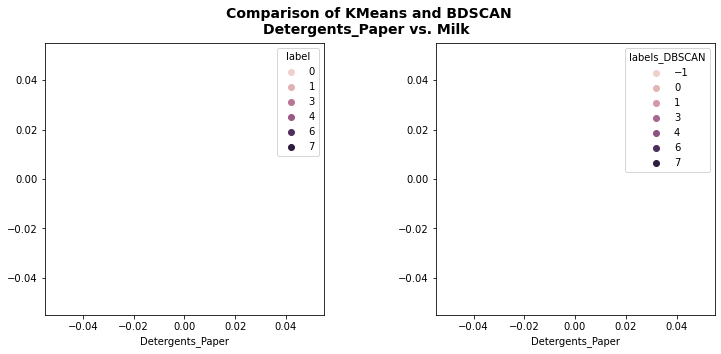

In [25]:
# Your code here:

fig = plt.figure(figsize=(12, 5))

fig.subplots_adjust(hspace=1, wspace=0.4)

fig.suptitle('Comparison of KMeans and BDSCAN\nDetergents_Paper vs. Milk ', fontsize=14, fontweight='bold')

ax_1 = fig.add_subplot(1, 2, 1)

ax_2 = fig.add_subplot(1, 2, 2)

sns.scatterplot("Detergents_Paper", data=data, hue='label',ax=ax_1)

sns.scatterplot("Detergents_Paper", data=data, hue='labels_DBSCAN',ax=ax_2)

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

<AxesSubplot:xlabel='Grocery', ylabel='Fresh'>

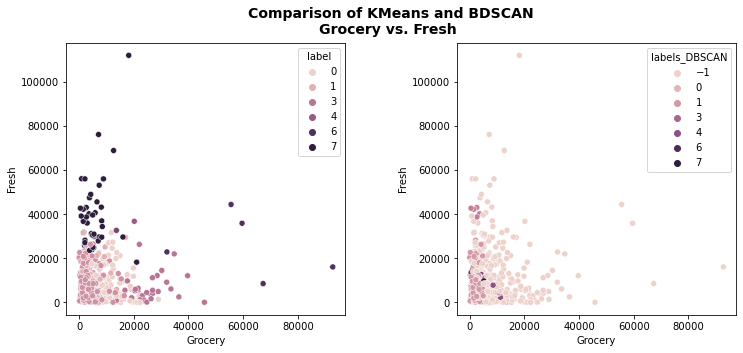

In [26]:
# Your code here:
fig = plt.figure(figsize=(12, 5))

fig.subplots_adjust(hspace=1, wspace=0.4)

fig.suptitle('Comparison of KMeans and BDSCAN\nGrocery vs. Fresh ', fontsize=14, fontweight='bold')

ax_1 = fig.add_subplot(1, 2, 1)

ax_2 = fig.add_subplot(1, 2, 2)

sns.scatterplot("Grocery","Fresh", data=data, hue='label',ax=ax_1)

sns.scatterplot("Grocery","Fresh", data=data, hue='labels_DBSCAN',ax=ax_2)

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

<AxesSubplot:xlabel='Frozen', ylabel='Delicassen'>

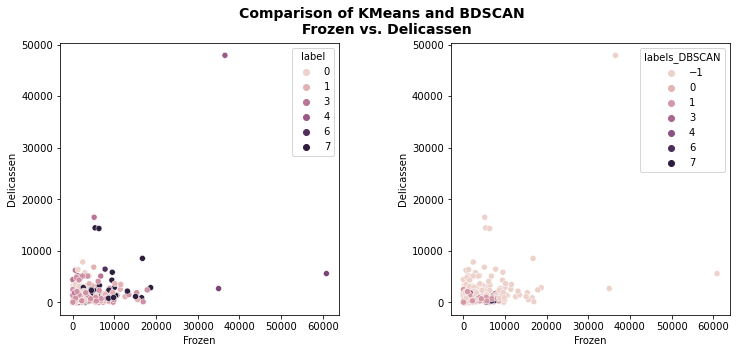

In [27]:
# Your code here:
fig = plt.figure(figsize=(12, 5))

fig.subplots_adjust(hspace=1, wspace=0.4)

fig.suptitle('Comparison of KMeans and BDSCAN \n Frozen vs. Delicassen', fontsize=14, fontweight='bold')

ax_1 = fig.add_subplot(1, 2, 1)

ax_2 = fig.add_subplot(1, 2, 2)

sns.scatterplot("Frozen","Delicassen", data=data, hue='label',ax=ax_1)

sns.scatterplot("Frozen","Delicassen", data=data, hue='labels_DBSCAN',ax=ax_2)

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [28]:
# Your code here:

data.groupby('label').agg('mean')

Channel    Region         Fresh          Milk       Grocery  \
label                                                                
0      2.00000  2.775510   8269.969388   7533.816327  11740.938776   
1      1.05814  1.313953  10368.593023   3192.395349   4063.930233   
2      1.00000  3.000000   8816.377143   2952.085714   3427.154286   
3      2.00000  2.281250   5985.437500  16817.625000  25628.656250   
4      1.00000  3.000000  36847.000000  43950.000000  20170.000000   
5      1.00000  2.500000  22015.500000   9937.000000   7844.000000   
6      2.00000  2.800000  25603.000000  43460.600000  61472.200000   
7      1.04878  2.780488  39870.292683   4916.853659   5740.585366   

             Frozen  Detergents_Paper    Delicassen  labels_DBSCAN  
label                                                               
0       1331.816327       4847.285714   1476.653061      -0.387755  
1       3235.662791        867.732558   1107.662791       1.488372  
2       2680.851429        774.268571   1006.748571       0.462857  
3       1840.000000      12321.750000   2455.093750      -1.000000  
4      36534.000000        239.000000  47943.000000      -1.000000  
5      47939.000000        671.500000   4153.500000      -1.000000  
6       2636.000000      29974.200000   2708.800000      -1.000000  
7       6566.926829        901.268293   2595.951220      -0.536585

In [29]:
data.groupby('labels_DBSCAN').agg('mean')

Channel   Region         Fresh          Milk       Grocery  \
labels_DBSCAN                                                                
-1             1.490196  2.45098  13729.564706   8359.886275  11484.364706   
 0             2.000000  3.00000  11401.000000   3536.200000   6729.000000   
 1             1.000000  3.00000   9128.823077   1862.438462   2423.530769   
 2             1.000000  3.00000  41446.600000   1421.200000   2167.600000   
 3             2.000000  3.00000   2357.200000  10224.800000  11862.800000   
 4             2.000000  3.00000   3068.142857   6095.857143  10355.000000   
 5             1.000000  1.00000   9837.863636   1751.863636   2161.681818   
 6             1.000000  1.00000   6823.000000   1943.000000   2372.666667   
 7             1.000000  2.00000   7494.600000   1537.600000   3383.000000   

                    Frozen  Detergents_Paper   Delicassen     label  
labels_DBSCAN                                                        
-1             3795.003922       4356.800000  2080.470588  2.058824  
 0              720.200000       3561.000000   258.200000  0.000000  
 1             2131.430769        496.576923   741.946154  2.076923  
 2             1276.400000        416.200000   784.800000  7.000000  
 3              609.600000       5780.000000   572.800000  0.000000  
 4              994.000000       4675.571429  1826.428571  0.000000  
 5             1513.181818        333.954545   669.045455  1.000000  
 6             6780.333333        386.500000   613.666667  1.000000  
 7             2575.400000        227.400000   941.000000  1.000000

Which algorithm appears to perform better?

In [30]:
# Your observations here

# Challenge 6 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [31]:
# Your code here
#Try 5 clusters
kmeans5 = KMeans(n_clusters=5)

kmeans5.fit(customers_scale)

data['label_k5'] = kmeans5.labels_

data['label_k5'].value_counts()

0    210
4    125
1     91
2     10
3      4
Name: label_k5, dtype: int64

In [32]:
#Try 2 clusters
kmeans2 = KMeans(n_clusters=2)

kmeans2.fit(customers_scale)

data['label_k2'] = kmeans2.labels_

data['label_k2'].value_counts()

0    306
1    134
Name: label_k2, dtype: int64

In [33]:
#Try 10 clusters
kmeans10 = KMeans(n_clusters=10)

kmeans10.fit(customers_scale)

data['label_k10'] = kmeans10.labels_

data['label_k10'].value_counts()

2    136
0     98
1     77
7     45
8     33
3     32
9     12
6      5
4      1
5      1
Name: label_k10, dtype: int64

In [34]:
#Try 4 clusters
kmeans4 = KMeans(n_clusters=4)

kmeans4.fit(customers_scale)

data['label_k4'] = kmeans4.labels_

data['label_k4'].value_counts()

0    210
3    125
1     92
2     13
Name: label_k4, dtype: int64

In [35]:
#Try 3 clusters
kmeans3 = KMeans(n_clusters=3)

kmeans3.fit(customers_scale)

data['label_k3'] = kmeans3.labels_

data['label_k3'].value_counts()

0    296
2    130
1     14
Name: label_k3, dtype: int64

In [36]:
data

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  label  labels_DBSCAN  label_k5  label_k2  label_k10  \
0          1338      0             -1         4         1          0   
1          1776      0             -1         4         1          0   
2          7844      0             -1         4         1          0   
3          1788      2              1         0         0          2   
4          5185      0             -1         4         1          0   
..          ...    ...            ...       ...       ...        ...   
435        2204      7             -1         0         0          8   
436        2346      7             -1         0         0          7   
437        1867      3             -1         4         1          3   
438        2125      2              1         0         0          2   
439          52      2              1         0         0          2   

     label_k4  label_k3  
0           3         2  
1           3         2  
2           3         2  
3           0         0  
4           3         2  
..        ...       ...  
435         0         0  
436         0         0  
437         3         2  
438         0         0  
439         0         0  

[440 rows x 15 columns]

<AxesSubplot:xlabel='Fresh', ylabel='Milk'>

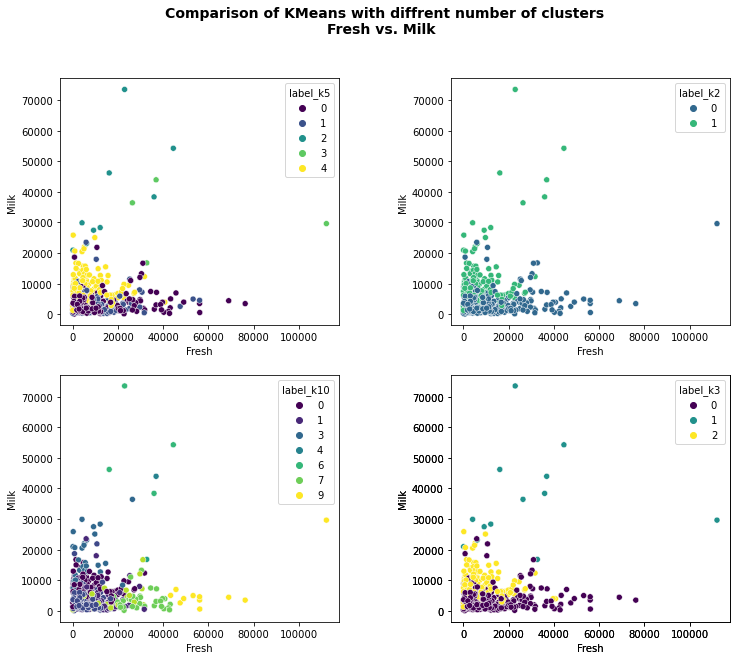

In [37]:
fig = plt.figure(figsize=(12, 10))

fig.subplots_adjust(hspace=0.2, wspace=0.4)

fig.suptitle('Comparison of KMeans with diffrent number of clusters\nFresh vs. Milk ', 
             fontsize=14, fontweight='bold')

ax_1 = fig.add_subplot(2, 2, 1)

ax_2 = fig.add_subplot(2, 2, 2)

ax_3 = fig.add_subplot(2, 2, 3)

ax_4 = fig.add_subplot(2, 2, 4)

ax_5 = fig.add_subplot(2, 2, 4)

sns.scatterplot("Fresh","Milk", data=data, palette="viridis", hue='label_k5',ax=ax_1)
sns.scatterplot("Fresh","Milk", data=data, palette="viridis", hue='label_k2',ax=ax_2)
sns.scatterplot("Fresh","Milk", data=data, palette="viridis", hue='label_k10',ax=ax_3)
sns.scatterplot("Fresh","Milk", data=data, palette="viridis", hue='label_k4',ax=ax_4)
sns.scatterplot("Fresh","Milk", data=data, palette="viridis", hue='label_k3',ax=ax_5)

In [38]:
# Your comment here
#The better is 2 clusters

# Challenge 7 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [39]:
# Your code here
dbscan_cluster1 = DBSCAN(eps=0.3, min_samples=5)

dbscan_cluster1.fit(customers_scale)

data['labels_DBSCAN1'] = dbscan_cluster1.labels_

data['labels_DBSCAN1'].value_counts()

-1    370
 0     70
Name: labels_DBSCAN1, dtype: int64

In [40]:
dbscan_cluster2 = DBSCAN(eps=0.5, min_samples=10)

dbscan_cluster2.fit(customers_scale)

data['labels_DBSCAN2'] = dbscan_cluster2.labels_

data['labels_DBSCAN2'].value_counts()

-1    313
 0    114
 1     13
Name: labels_DBSCAN2, dtype: int64

In [41]:
dbscan_cluster3 = DBSCAN(eps=0.9, min_samples=16)

dbscan_cluster3.fit(customers_scale)

data['labels_DBSCAN3'] = dbscan_cluster3.labels_

data['labels_DBSCAN3'].value_counts()

 1    167
-1    149
 0     69
 2     39
 3     16
Name: labels_DBSCAN3, dtype: int64

In [42]:
dbscan_cluster4 = DBSCAN(eps=1, min_samples=20)

dbscan_cluster4.fit(customers_scale)

data['labels_DBSCAN4'] = dbscan_cluster4.labels_

data['labels_DBSCAN4'].value_counts()

 1    176
-1    149
 0     72
 2     43
Name: labels_DBSCAN4, dtype: int64

<AxesSubplot:title={'center':'eps=1, min_samples=20'}, xlabel='Fresh', ylabel='Milk'>

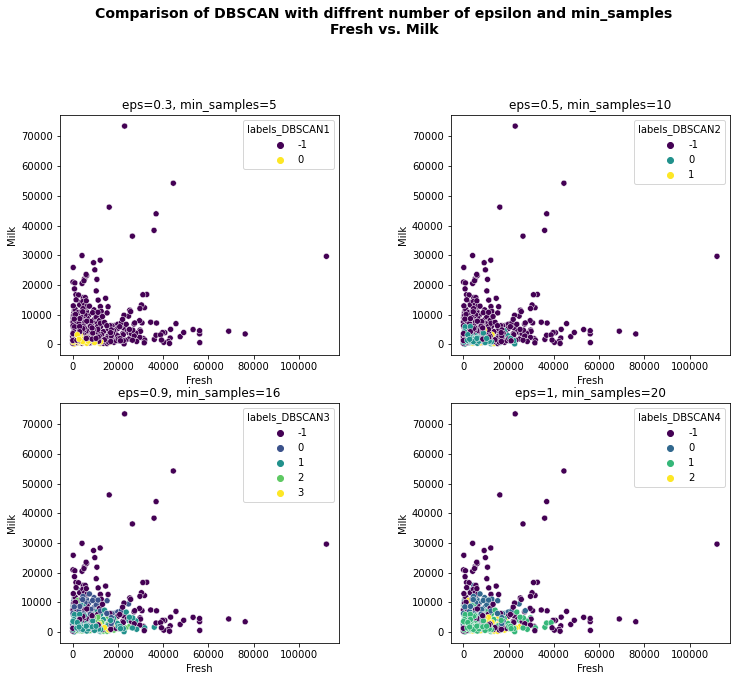

In [43]:
fig = plt.figure(figsize=(12, 15))
fig.subplots_adjust(hspace=0.2, wspace=0.4)
fig.suptitle('Comparison of DBSCAN with diffrent number of epsilon and min_samples\nFresh vs. Milk', fontsize=14, fontweight='bold')

ax_1 = fig.add_subplot(3, 2, 1)
ax_2 = fig.add_subplot(3, 2, 2)
ax_3 = fig.add_subplot(3, 2, 3)
ax_4 = fig.add_subplot(3, 2, 4)


ax_1.set_title('eps=0.3, min_samples=5')
ax_2.set_title('eps=0.5, min_samples=10')
ax_3.set_title('eps=0.9, min_samples=16')
ax_4.set_title('eps=1, min_samples=20')


sns.scatterplot("Fresh","Milk", data=data, palette="viridis", hue='labels_DBSCAN1',ax=ax_1)
sns.scatterplot("Fresh","Milk", data=data, palette="viridis", hue='labels_DBSCAN2',ax=ax_2)
sns.scatterplot("Fresh","Milk", data=data, palette="viridis", hue='labels_DBSCAN3',ax=ax_3)
sns.scatterplot("Fresh","Milk", data=data, palette="viridis", hue='labels_DBSCAN4',ax=ax_4)


<AxesSubplot:title={'center':'eps=1, min_samples=20'}, xlabel='Fresh', ylabel='Delicassen'>

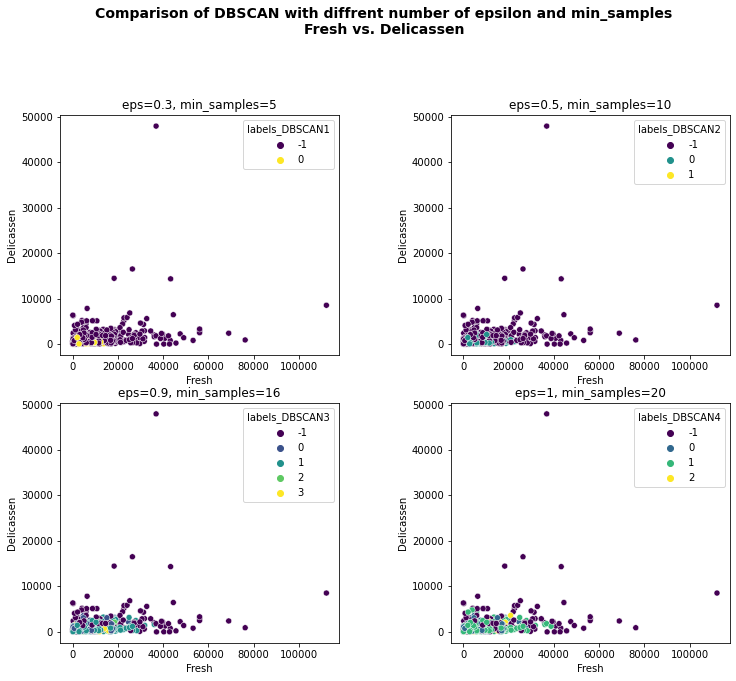

In [44]:
fig = plt.figure(figsize=(12, 15))
fig.subplots_adjust(hspace=0.2, wspace=0.4)
fig.suptitle('Comparison of DBSCAN with diffrent number of epsilon and min_samples\nFresh vs. Delicassen', fontsize=14, fontweight='bold')

ax_1 = fig.add_subplot(3, 2, 1)
ax_2 = fig.add_subplot(3, 2, 2)
ax_3 = fig.add_subplot(3, 2, 3)
ax_4 = fig.add_subplot(3, 2, 4)


ax_1.set_title('eps=0.3, min_samples=5')
ax_2.set_title('eps=0.5, min_samples=10')
ax_3.set_title('eps=0.9, min_samples=16')
ax_4.set_title('eps=1, min_samples=20')


sns.scatterplot("Fresh","Delicassen", data=data, palette="viridis", hue='labels_DBSCAN1',ax=ax_1)
sns.scatterplot("Fresh","Delicassen", data=data, palette="viridis", hue='labels_DBSCAN2',ax=ax_2)
sns.scatterplot("Fresh","Delicassen", data=data, palette="viridis", hue='labels_DBSCAN3',ax=ax_3)
sns.scatterplot("Fresh","Delicassen", data=data, palette="viridis", hue='labels_DBSCAN4',ax=ax_4)



In [45]:
# Your comment here